In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

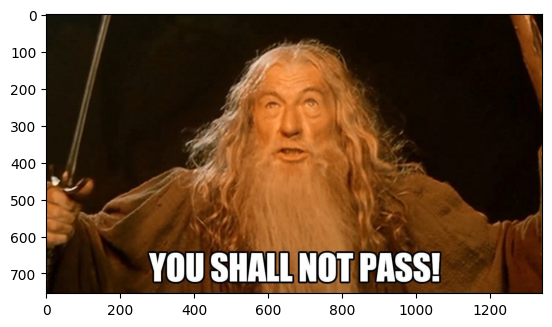

In [8]:
img=mpimg.imread('gandalf.jpg')
img.shape
fig, ax = plt.subplots()

plt.imshow(img[:,:,:])
plt.show()

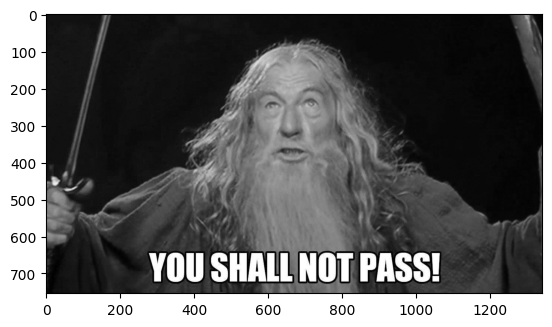

(754, 1341)

In [9]:
X = rgb2gray(img/255.)

fig, ax = plt.subplots()

plt.imshow(X, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()
X.shape

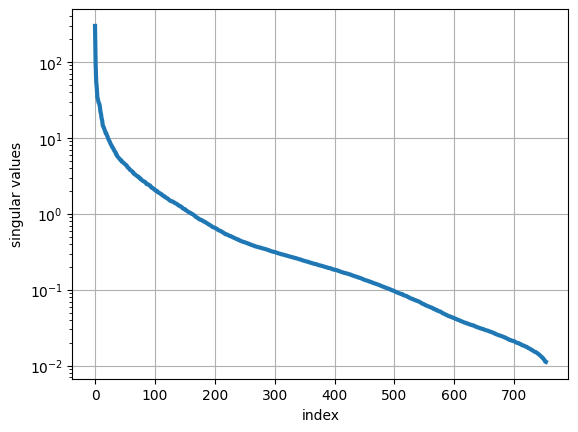

In [10]:
U, S, Vh = np.linalg.svd(X, full_matrices=True)

fig, ax = plt.subplots()
plt.grid('True')

ax.set_xlabel('index')
ax.set_ylabel('singular values')

plt.semilogy()
ax.plot(S, lw=3)

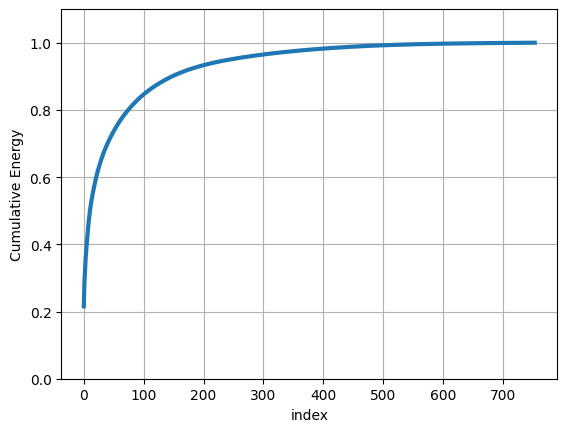

In [11]:
CumEn = np.cumsum(S)/np.sum(S)

fig, ax = plt.subplots()
plt.grid('True')

ax.set_xlabel('index')
ax.set_ylabel('Cumulative Energy')

ax.set_ylim([0,1.1])

ax.plot(CumEn,lw=3)

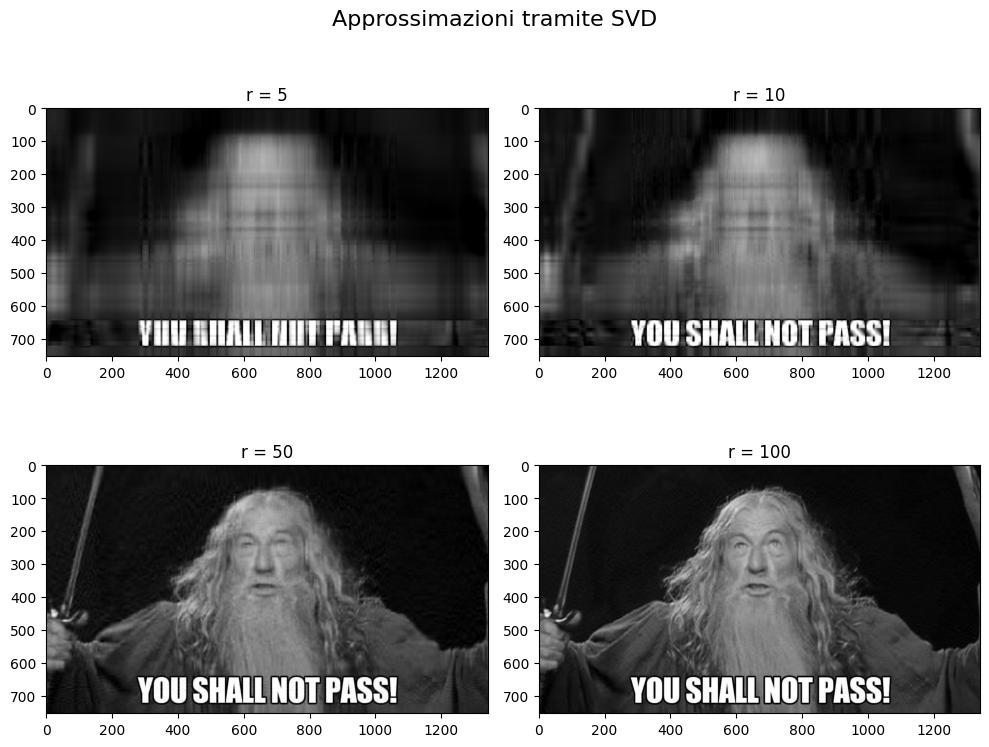

In [21]:
r_val = np.array([5, 10, 50, 100])

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for ax, r in zip(axs.flat, r_val):
    U_tilde  = U[:, :r]
    S_tilde  = S[:r]
    Vh_tilde = Vh[:r, :]

    X_tilde = U_tilde @ np.diag(S_tilde) @ Vh_tilde

    im = ax.imshow(X_tilde, cmap="gray", vmin=0, vmax=1)
    ax.set_title(f"r = {r}")

fig.suptitle("Approssimazioni tramite SVD", fontsize=16)
plt.tight_layout()
plt.show()
